In [53]:
import pandas as pd
from pandas_plink import read_plink1_bin
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
expression = pd.read_csv("GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz", delimiter='\t')

In [3]:
G = read_plink1_bin("1000G.EUR.1.bed", "1000G.EUR.1.bim", "1000G.EUR.1.fam", verbose=False)

In [4]:
len(np.array(G.a0))

98642

In [5]:

chromosome = "chr1"
gene_start =  11766537  # Example start position
gene_end =  11793046   # Example end position
gene_name = "MTHFR"
score = 0  
strand = "+"  

# Calculate the +/- 500 kb window
window_start = max(0, gene_start - 500000)  # Ensure start is not negative
window_end = gene_end + 500000

# Create the text line with tab delimiters
line = f"{chromosome}\t{window_start}\t{window_end}\t{gene_name}\t{score}\t{strand}\n"

# Write to a text file
with open("gene_coordinates.txt", "w") as file:
    file.write(line)

print("File gene_coordinates.txt created successfully.")

File gene_coordinates.txt created successfully.


In [6]:
!./plink2 --bfile 1000G.EUR.1 --extract bed1 gene_coordinates.txt --out 1000G.EUR.1.GeneMTHFR -make-bed

PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000G.EUR.1.GeneMTHFR.log.
Options in effect:
  --bfile 1000G.EUR.1
  --extract bed1 gene_coordinates.txt
  --make-bed
  --out 1000G.EUR.1.GeneMTHFR

Start time: Tue Oct 29 21:11:47 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
489 samples (0 females, 0 males, 489 ambiguous; 489 founders) loaded from
1000G.EUR.1.fam.
98642 variants loaded from 1000G.EUR.1.bim.
Note: No phenotype data present.
--extract bed1: 98146 variants excluded.
496 variants remaining after main filters.
Writing 1000G.EUR.1.GeneMTHFR.fam ... done.
Writing 1000G.EUR.1.GeneMTHFR.bim ... done.
Writing 1000G.EUR.1.GeneMTHFR.bed ... done.
End time: Tue Oct 29 21:11:47 2024


In [7]:
G_M = read_plink1_bin("1000G.EUR.1.GeneMTHFR.bed", "1000G.EUR.1.GeneMTHFR.bim", "1000G.EUR.1.GeneMTHFR.fam", verbose=False)

In [8]:
G_M

<xarray.DataArray 'genotype' (sample: 489, variant: 496)>
dask.array<transpose, shape=(489, 496), dtype=float32, chunksize=(489, 496), chunktype=numpy.ndarray>
Coordinates: (12/14)
  * sample   (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
  * variant  (variant) <U10 'variant0' 'variant1' ... 'variant494' 'variant495'
    fid      (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
    iid      (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
    father   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    mother   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    ...       ...
    chrom    (variant) object '1' '1' '1' '1' '1' '1' ... '1' '1' '1' '1' '1'
    snp      (variant) object 'rs1010447' 'rs7526649' ... 'rs235237' 'rs426536'
    cm       (variant) float64 22.57 22.57 22.57 22.57 ... 25.44 25.44 25.44
    pos      (variant) int32 11269796 11278163 11284336 ... 12279581 12287617
    a0       (variant) object 'T' 'C' 'A' 'T' 'G' 'G' ... 'T' 'A' 'A' 'C' 'A'
    a1       (variant) object 'C' 'T' 'G' 'C' 'A' 'A' ... 'C' 'C' 'G' 'T' 'G'

In [9]:
expression1 = expression[expression['Chr'] == '1']

In [10]:
target_gene = "ENSG00000177000"
index = 0
for i in expression1['TargetID']:
    if target_gene in i:
        print ('yes, index is ', i)
    index += 1

yes, index is  ENSG00000177000.6


In [11]:
gene_expression = expression1[expression1['TargetID'] == 'ENSG00000177000.6']
gene_expression_data = gene_expression.T.iloc[4:,]

In [12]:
gene_expression_data.columns = ['ENSG00000177000.6']

In [13]:
gene_expression_data

,ENSG00000177000.6
HG00096,5.09859
HG00097,3.92123
HG00099,4.488247
HG00100,5.722556
HG00101,5.216492
...,...
NA20815,5.379399
NA20816,5.517672
NA20819,6.711428
NA20826,4.829876


In [14]:
G_M

<xarray.DataArray 'genotype' (sample: 489, variant: 496)>
dask.array<transpose, shape=(489, 496), dtype=float32, chunksize=(489, 496), chunktype=numpy.ndarray>
Coordinates: (12/14)
  * sample   (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
  * variant  (variant) <U10 'variant0' 'variant1' ... 'variant494' 'variant495'
    fid      (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
    iid      (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
    father   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    mother   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    ...       ...
    chrom    (variant) object '1' '1' '1' '1' '1' '1' ... '1' '1' '1' '1' '1'
    snp      (variant) object 'rs1010447' 'rs7526649' ... 'rs235237' 'rs426536'
    cm       (variant) float64 22.57 22.57 22.57 22.57 ... 25.44 25.44 25.44
    pos      (variant) int32 11269796 11278163 11284336 ... 12279581 12287617
    a0       (variant) object 'T' 'C' 'A' 'T' 'G' 'G' ... 'T' 'A' 'A' 'C' 'A'
    a1       (variant) object 'C' 'T' 'G' 'C' 'A' 'A' ... 'C' 'C' 'G' 'T' 'G'

In [15]:
genotype_matrix = G_M.compute()

In [16]:
genotype_matrix.shape


(489, 496)

In [17]:
_columns = np.array(G_M.snp)

In [18]:
_index = np.array(G_M.sample)

In [19]:
snp_df = pd.DataFrame(np.array(genotype_matrix), index = _index, columns = _columns)

In [20]:
gene_expression_data

,ENSG00000177000.6
HG00096,5.09859
HG00097,3.92123
HG00099,4.488247
HG00100,5.722556
HG00101,5.216492
...,...
NA20815,5.379399
NA20816,5.517672
NA20819,6.711428
NA20826,4.829876


In [21]:
snp_df

,rs1010447,rs7526649,rs10779751,rs12124983,rs1064261,rs2076655,rs11121703,rs11121704,rs2024627,rs7544489,...,rs1061631,rs1800621,rs5746073,rs5746074,rs235215,rs235214,rs7552664,rs7550488,rs235237,rs426536
HG00096,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0
HG00097,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
HG00099,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0
HG00101,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
HG00102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20822,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0
NA20826,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
NA20827,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
NA20828,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [22]:
entire_df = pd.merge(gene_expression_data, snp_df, left_index=True, right_index=True, how='inner')

In [23]:
entire_df

,ENSG00000177000.6,rs1010447,rs7526649,rs10779751,rs12124983,rs1064261,rs2076655,rs11121703,rs11121704,rs2024627,...,rs1061631,rs1800621,rs5746073,rs5746074,rs235215,rs235214,rs7552664,rs7550488,rs235237,rs426536
HG00096,5.09859,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0
HG00097,3.92123,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
HG00099,4.488247,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0
HG00101,5.216492,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
HG00102,4.576357,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20814,5.186808,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0
NA20815,5.379399,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
NA20819,6.711428,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0
NA20826,4.829876,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0


In [24]:
gene_expression_data = entire_df[['ENSG00000177000.6']]
snp_df =  entire_df.iloc[:, 1:]


In [25]:
from sklearn.linear_model import LinearRegression
from scipy import stats


results = []
for snp_ in range(len(snp_df.columns)):
    
    the_expression = list(np.array(gene_expression_data.iloc[:,0].values))
    snp_genotype = list(np.array(snp_df.iloc[:,snp_].values))
    snp_genotype_reshaped = np.array(snp_genotype).reshape(-1, 1)
    model = LinearRegression()
    model.fit(snp_genotype_reshaped, the_expression)
    stats.linregress(snp_genotype, the_expression)
    each_states = stats.linregress(snp_genotype, the_expression)
    results.append([snp_df.columns[snp_], model.coef_[0], each_states.pvalue])


results_df = pd.DataFrame(results, columns=["SNP", "Beta", "P-value"])


In [26]:
the_expression = list(np.array(gene_expression_data.iloc[:,0].values))
snp_genotype = list(np.array(snp_df.iloc[:,1].values))
a = stats.linregress(snp_genotype, the_expression)

In [27]:
a.pvalue

0.6730720298908015

In [28]:
results_df

,SNP,Beta,P-value
0,rs1010447,-0.039232,0.673072
1,rs7526649,-0.039232,0.673072
2,rs10779751,-0.039232,0.673072
3,rs12124983,-0.001161,0.989892
4,rs1064261,-0.039232,0.673072
...,...,...,...
491,rs235214,0.205428,0.105804
492,rs7552664,0.041011,0.675846
493,rs7550488,-0.031934,0.753105
494,rs235237,-0.216385,0.616165


In [29]:
G_M.pos

<xarray.DataArray 'pos' (variant: 496)>
array([11269796, 11278163, 11284336, 11286178, 11288758, 11289161,
       11293792, 11293959, 11298790, 11299511, 11301714, 11302065,
       11304720, 11305663, 11313244, 11318236, 11322156, 11324193,
       11324519, 11325910, 11326788, 11340342, 11340472, 11344259,
       11345339, 11346336, 11347492, 11355449, 11360193, 11360957,
       11361427, 11364920, 11372638, 11377114, 11390336, 11395283,
       11395771, 11398365, 11400409, 11401745, 11402749, 11404632,
       11409176, 11409469, 11411071, 11414172, 11415659, 11416252,
       11419868, 11421815, 11427302, 11432744, 11435942, 11436157,
       11438026, 11439588, 11444184, 11444975, 11447805, 11452564,
       11453577, 11456027, 11461601, 11465290, 11467354, 11468442,
       11473323, 11476203, 11476541, 11477192, 11477294, 11477341,
       11480820, 11485666, 11488203, 11489175, 11489255, 11489678,
       11490744, 11493814, 11493832, 11493868, 11494573, 11494851,
       11496715, 11496994, 11499286, 11499416, 11501431, 11502829,
       11502851, 11504514, 11505486, 11508016, 11508362, 11516521,
       11518397, 11520653, 11522061, 11522312, 11525533, 11526896,
       11527304, 11531059, 11531076, 11531918, 11533011, 11534053,
       11534542, 11537977, 11542957, 11547064, 11551816, 11554595,
       11556418, 11557926, 11557970, 11561937, 11562490, 11564507,
...
       12038990, 12040479, 12042261, 12042755, 12044164, 12046063,
       12046089, 12048130, 12050634, 12052405, 12053100, 12053264,
       12054030, 12054911, 12059412, 12060869, 12062205, 12065170,
       12065841, 12067044, 12070292, 12070920, 12073785, 12082461,
       12082881, 12082926, 12087749, 12090001, 12094046, 12095868,
       12105048, 12105332, 12112720, 12113240, 12115691, 12117901,
       12128498, 12130051, 12135526, 12140588, 12144434, 12147753,
       12153188, 12156236, 12158567, 12164078, 12164090, 12164137,
       12164675, 12166855, 12168523, 12169400, 12170974, 12171012,
       12180805, 12183245, 12183372, 12184423, 12185036, 12185335,
       12185533, 12186797, 12187130, 12187594, 12188345, 12188482,
       12188614, 12189561, 12192270, 12194451, 12194612, 12194745,
       12203195, 12206652, 12206755, 12206866, 12209208, 12213165,
       12216488, 12217852, 12219910, 12223451, 12223482, 12224239,
       12232806, 12233754, 12234885, 12239530, 12240676, 12241991,
       12242458, 12246175, 12248503, 12249031, 12249770, 12250888,
       12250979, 12251318, 12251808, 12252955, 12253062, 12258231,
       12261972, 12262298, 12262792, 12264355, 12267265, 12267999,
       12268499, 12268571, 12268637, 12268721, 12269947, 12271503,
       12277967, 12278932, 12279581, 12287617], dtype=int32)
Coordinates:
  * variant  (variant) <U10 'variant0' 'variant1' ... 'variant494' 'variant495'
    chrom    (variant) object '1' '1' '1' '1' '1' '1' ... '1' '1' '1' '1' '1'
    snp      (variant) object 'rs1010447' 'rs7526649' ... 'rs235237' 'rs426536'
    cm       (variant) float64 22.57 22.57 22.57 22.57 ... 25.44 25.44 25.44
    pos      (variant) int32 11269796 11278163 11284336 ... 12279581 12287617
    a0       (variant) object 'T' 'C' 'A' 'T' 'G' 'G' ... 'T' 'A' 'A' 'C' 'A'
    a1       (variant) object 'C' 'T' 'G' 'C' 'A' 'A' ... 'C' 'C' 'G' 'T' 'G'

In [30]:
snp_positions = pd.DataFrame({
    'snp': G_M['snp'],  # The SNP column
    'position': G_M['pos']  # The SNP positions (base pair positions)
})

In [31]:
subset_positions = snp_positions[snp_positions['snp'].isin(results_df['SNP'])]

In [32]:
result_position_df = pd.merge(results_df, subset_positions, left_on="SNP", right_on='snp')

In [33]:
result_position_df

,SNP,Beta,P-value,snp,position
0,rs1010447,-0.039232,0.673072,rs1010447,11269796
1,rs7526649,-0.039232,0.673072,rs7526649,11278163
2,rs10779751,-0.039232,0.673072,rs10779751,11284336
3,rs12124983,-0.001161,0.989892,rs12124983,11286178
4,rs1064261,-0.039232,0.673072,rs1064261,11288758
...,...,...,...,...,...
491,rs235214,0.205428,0.105804,rs235214,12271503
492,rs7552664,0.041011,0.675846,rs7552664,12277967
493,rs7550488,-0.031934,0.753105,rs7550488,12278932
494,rs235237,-0.216385,0.616165,rs235237,12279581


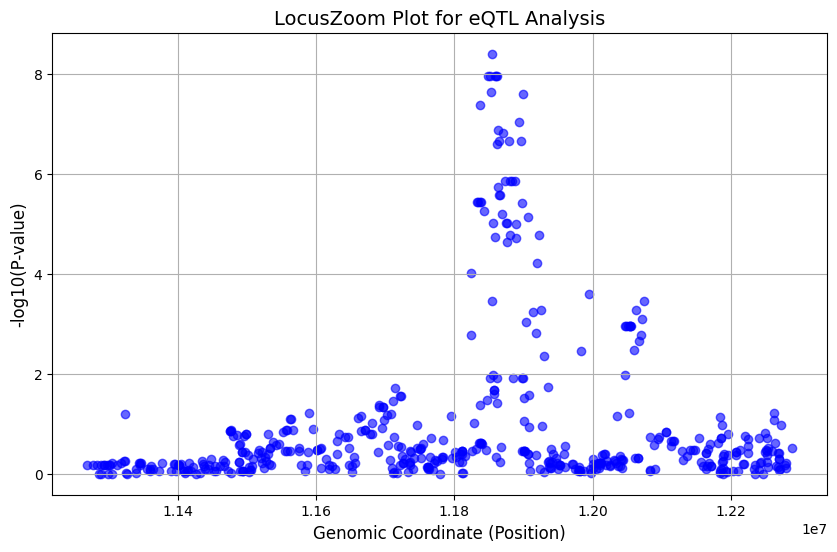

In [34]:
result_position_df['-log10(P-value)'] = -np.log10(result_position_df['P-value'])
plt.figure(figsize=(10, 6))

plt.scatter(result_position_df['position'], result_position_df['-log10(P-value)'], c='blue', alpha=0.6)


plt.xlabel('Genomic Coordinate (Position)', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.title('LocusZoom Plot for eQTL Analysis', fontsize=14)

plt.grid(True)
plt.show()

In [421]:
def calculate_rpkm(read_counts, gene_length, total_mapped_reads):
    # Convert gene length to kilobases
    gene_length_kb = gene_length
    # Calculate RPKM
    rpkm = (read_counts / (gene_length_kb * (total_mapped_reads / 1e6)))
    return rpkm

def calculate_tpm(read_counts_list, gene_length_list):
    # Step 1: Calculate RPK for each gene
    rpk_list = [read_count / (gene_length / 1000.0) for read_count, gene_length in zip(read_counts_list, gene_length_list)]
    
    # Step 2: Calculate the sum of all RPK values
    total_rpk = sum(rpk_list)
    
    # Step 3: Calculate TPM for each gene
    tpm_list = [(rpk / total_rpk) * 1e6 for rpk in rpk_list]
    return tpm_list

# Example data
read_counts_list = [53000, 105000, 68000]  # Read counts for each gene
gene_length_list = [3, 10, 6]  # Length of each gene in base pairs
total_mapped_reads = sum(read_counts_list)  # Total number of reads mapped in the sample

# Calculate RPKM for each gene
rpkm_list = [calculate_rpkm(read_counts, gene_length, total_mapped_reads) 
             for read_counts, gene_length in zip(read_counts_list, gene_length_list)]
print("RPKM values:", rpkm_list)

# Calculate TPM for each gene
tpm_list = calculate_tpm(read_counts_list, gene_length_list)
print("TPM values:", tpm_list)

RPKM values: [78171.09144542772, 46460.17699115044, 50147.49262536873]
TPM values: [447257.38396624476, 265822.7848101266, 286919.83122362866]


In [36]:
a = ((48+110+54) * (10**3)) / 10**6

In [37]:
480000 / (a * 3)

754716.9811320754

In [38]:
0.23500000208888894 * 10**6

235000.00208888893

In [39]:
45000+130000+60000

235000

In [40]:
import numpy as np
a = np.array([45000,130000,60000])
b = np.array((2,11,5))
(a / b) / sum(a / b) * 10**6

array([485770.36310108, 255152.10991168, 259077.52698724])

In [41]:
a = np.array([48000,110000,54000])
b = np.array((3,10,6))
(a / b) / sum(a / b) * 10**6

array([444444.44444444, 305555.55555556, 250000.        ])

In [42]:
a = np.array([55000,100000,65000])
b = np.array((2,11,5))
(a / b) / sum(a / b) * 10**6

array([554537.12190651, 183318.0568286 , 262144.82126489])

In [43]:
a = np.array([53000,105000,68000])
b = np.array((3,10,6))
(a / b) / sum(a / b) * 10**6

array([447257.38396624, 265822.78481013, 286919.83122363])

In [44]:
286919.83 / 250000

1.1476793200000002

In [57]:
gene = pd.read_table("/Users/kevinmbp/Desktop/dsc190/hw2/gene_annot.txt.gz", compression='gzip')

In [58]:
gene

,ID,CHR,START,STOP,SYM,TYPE
0,DDX11L1,1,11868,13052,ENSG00000223972,transcribed_unprocessed_pseudogene
1,OR4F5,1,69090,70008,ENSG00000186092,protein_coding
2,FAM87B,1,817370,819834,ENSG00000177757,lincRNA
3,LINC00115,1,826205,827522,ENSG00000225880,lincRNA
4,LINC01128,1,827607,859446,ENSG00000228794,processed_transcript
...,...,...,...,...,...,...
20495,ARSA,22,50622753,50628179,ENSG00000100299,protein_coding
20496,SHANK3,22,50674414,50733298,ENSG00000251322,protein_coding
20497,ACR,22,50738195,50745334,ENSG00000100312,protein_coding
20498,RPL23AP82,22,50756947,50801309,ENSG00000184319,transcribed_unprocessed_pseudogene


In [68]:
gene1 = gene[gene['CHR']==1]
gene1['chromosome'] = 'chr1'
gene1['strand'] = '+'
gene1


/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_79638/1470001579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene1['chromosome'] = 'chr1'
/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_79638/1470001579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene1['strand'] = '+'


,ID,CHR,START,STOP,SYM,TYPE,chromosome,strand
0,DDX11L1,1,11868,13052,ENSG00000223972,transcribed_unprocessed_pseudogene,chr1,+
1,OR4F5,1,69090,70008,ENSG00000186092,protein_coding,chr1,+
2,FAM87B,1,817370,819834,ENSG00000177757,lincRNA,chr1,+
3,LINC00115,1,826205,827522,ENSG00000225880,lincRNA,chr1,+
4,LINC01128,1,827607,859446,ENSG00000228794,processed_transcript,chr1,+
...,...,...,...,...,...,...,...,...
2139,SH3BP5L,1,248810448,248826633,ENSG00000175137,protein_coding,chr1,+
2140,MIR3124,1,248826376,248826443,ENSG00000264500,miRNA,chr1,+
2141,ZNF672,1,248838209,248849517,ENSG00000171161,protein_coding,chr1,+
2142,ZNF692,1,248850005,248859085,ENSG00000171163,protein_coding,chr1,+


In [72]:


# Load gene table
gene_table = pd.DataFrame({
    'chromosome': ['chr1', 'chr1', 'chr2'],       # Example chromosomes
    'gene_start': [11766537, 15000000, 20000000], # Example start positions
    'gene_end': [11793046, 15200000, 20200000],   # Example end positions
    'gene_name': ['MTHFR', 'GENE2', 'GENE3'],     # Example gene names
    'strand': ['+', '-', '+']                     # Example strands
})

# Set parameters for cis-SNP window size
cis_window = 500000  # +/- 500 kb

# Define the function to create a PLINK command for each gene
def find_cis_snps(gene_info, plink_path="./plink2", bfile="1000G.EUR.1"):
    chromosome = gene_info['chromosome']
    gene_start = gene_info['START']
    gene_end = gene_info['STOP']
    gene_name = gene_info['ID']
    strand = gene_info['strand']
    score = 0  # Arbitrary score placeholder
    
    # Calculate the +/- cis_window for the gene
    window_start = max(0, gene_start - cis_window)
    window_end = gene_end + cis_window

    # Write coordinates to a temporary file for PLINK
    coord_file = f"{gene_name}_coordinates.txt"
    with open(coord_file, "w") as file:
        line = f"{chromosome}\t{window_start}\t{window_end}\t{gene_name}\t{score}\t{strand}\n"
        file.write(line)

    # Define the output file name for PLINK results
    output_prefix = f"{bfile}.{gene_name}"
    
    # Run PLINK command to extract cis-SNPs
    plink_command = f"{plink_path} --bfile {bfile} --extract bed1 {coord_file} --out {output_prefix} -make-bed"
    os.system(plink_command)
    
    # Remove the temporary file to clean up
    os.remove(coord_file)
    
    return output_prefix  # Returns the output prefix for each gene

# Apply the function to each gene in the gene table
for index, gene_info in gene1.iterrows():
    result_prefix = find_cis_snps(gene_info)
    print(f"Cis-SNPs for {gene_info['ID']} saved with prefix: {result_prefix}")

Error: No variants remaining after main filters.
Error: No variants remaining after main filters.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000G.EUR.1.DDX11L1.log.
Options in effect:
  --bfile 1000G.EUR.1
  --extract bed1 DDX11L1_coordinates.txt
  --make-bed
  --out 1000G.EUR.1.DDX11L1

Start time: Tue Oct 29 22:54:53 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
489 samples (0 females, 0 males, 489 ambiguous; 489 founders) loaded from
1000G.EUR.1.fam.
98642 variants loaded from 1000G.EUR.1.bim.
Note: No phenotype data present.
--extract bed1: 98642 variants excluded.
End time: Tue Oct 29 22:54:53 2024
Cis-SNPs for DDX11L1 saved with prefix: 1000G.EUR.1.DDX11L1
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000G.EUR.1.OR4F5.log.
Options in effect:
  --bfile 100

Error: No variants remaining after main filters.
Error: No variants remaining after main filters.
Error: No variants remaining after main filters.
Error: No variants remaining after main filters.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000G.EUR.1.FCGR1B.log.
Options in effect:
  --bfile 1000G.EUR.1
  --extract bed1 FCGR1B_coordinates.txt
  --make-bed
  --out 1000G.EUR.1.FCGR1B

Start time: Tue Oct 29 22:55:07 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
489 samples (0 females, 0 males, 489 ambiguous; 489 founders) loaded from
1000G.EUR.1.fam.
98642 variants loaded from 1000G.EUR.1.bim.
Note: No phenotype data present.
--extract bed1: 98642 variants excluded.
End time: Tue Oct 29 22:55:07 2024
Cis-SNPs for FCGR1B saved with prefix: 1000G.EUR.1.FCGR1B
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000G.EUR.1.HIST2H2BA.log.
Options in effect:
  --bfile 1000

Error: No variants remaining after main filters.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1000G.EUR.1.SF3B4.log.
Options in effect:
  --bfile 1000G.EUR.1
  --extract bed1 SF3B4_coordinates.txt
  --make-bed
  --out 1000G.EUR.1.SF3B4

Start time: Tue Oct 29 22:55:08 2024
32768 MiB RAM detected; reserving 16384 MiB for main workspace.
Using up to 10 threads (change this with --threads).
489 samples (0 females, 0 males, 489 ambiguous; 489 founders) loaded from
1000G.EUR.1.fam.
98642 variants loaded from 1000G.EUR.1.bim.
Note: No phenotype data present.
--extract bed1: 98498 variants excluded.
144 variants remaining after main filters.
Writing 1000G.EUR.1.SF3B4.fam ... done.
Writing 1000G.EUR.1.SF3B4.bim ... done.
Writing 1000G.EUR.1.SF3B4.bed ... done.
End time: Tue Oct 29 22:55:08 2024
Cis-SNPs for SF3B4 saved with prefix: 1000G.EUR.1.SF3B4
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/pli

In [79]:
expression1['ID'] = expression1['TargetID'].str.split('.').str[0]

/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_79638/151633628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression1['ID'] = expression1['TargetID'].str.split('.').str[0]


In [319]:

each_gene_expression = expression1[expression1['ID'] == gene1.iloc[411]['SYM']]
each_gene_expression_data = each_gene_expression.T.iloc[4:-1,]
each_gene_expression_data

,5073
HG00096,5.234728
HG00097,5.327604
HG00099,2.501946
HG00100,5.806807
HG00101,5.753137
...,...
NA20815,4.27376
NA20816,7.149266
NA20819,5.276196
NA20826,5.656191


In [321]:
each_gene_expression_data.columns = [gene1.iloc[411]['SYM']]

each_gene_name = gene1.iloc[411]['ID']
each_gene_name

'GMEB1'

In [275]:
each_G = read_plink1_bin(f"cis_snp/1000G.EUR.1.{each_gene_name}.bed", f"cis_snp/1000G.EUR.1.{each_gene_name}.bim", f"cis_snp/1000G.EUR.1.{each_gene_name}.fam", verbose=False)

In [276]:
each_G
each_genotype_matrix = each_G.compute()
each_genotype_matrix.shape



(489, 446)

In [277]:
_columns = np.array(each_G.snp)
_index = np.array(each_G.sample)
each_snp_df = pd.DataFrame(np.array(each_genotype_matrix), index = _index, columns = _columns)
each_entire_df = pd.merge(each_gene_expression_data, each_snp_df, left_index=True, right_index=True, how='inner')

In [278]:
each_entire_df

,ENSG00000163875,rs11584405,rs7526895,rs4503315,rs4074399,rs4233208,rs10752589,rs6697796,rs17498436,rs3924538,...,rs2036637,rs11264063,rs4653296,rs4652957,rs7545493,rs12119795,rs7515306,rs2174769,rs4652958,rs215197
HG00096,27.802828,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
HG00097,21.186939,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00099,20.032883,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
HG00101,21.908897,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
HG00102,28.113428,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,...,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20814,29.849593,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
NA20815,45.458361,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
NA20819,26.65961,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
NA20826,22.406469,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0


In [279]:
each_gene_expression_data = each_entire_df.iloc[:,0]
each_snp_df = each_entire_df.iloc[:,1:]


In [280]:
results = []
for snp_ in range(len(each_snp_df.columns)):
    
    the_expression = list(np.array(each_gene_expression_data.values))
    snp_genotype = list(np.array(each_snp_df.iloc[:,snp_].values))
    snp_genotype_reshaped = np.array(snp_genotype).reshape(-1, 1)
    model = LinearRegression()
    model.fit(snp_genotype_reshaped, the_expression)
    stats.linregress(snp_genotype, the_expression)
    each_states = stats.linregress(snp_genotype, the_expression)
    results.append([each_snp_df.columns[snp_], model.coef_[0], each_states.pvalue])


results_df = pd.DataFrame(results, columns=["SNP", "Beta", "P-value"])

In [281]:
results_df

,SNP,Beta,P-value
0,rs11584405,-0.530551,2.666495e-01
1,rs7526895,-0.145608,7.275101e-01
2,rs4503315,-0.160601,6.641412e-01
3,rs4074399,0.207414,7.457855e-01
4,rs4233208,-0.160601,6.641412e-01
...,...,...,...
441,rs12119795,-0.319954,5.253521e-01
442,rs7515306,1.310945,8.436679e-03
443,rs2174769,1.272977,1.041322e-02
444,rs4652958,-2.559634,2.593628e-11


In [282]:
snp_positions = pd.DataFrame({
    'snp': each_G['snp'],  # The SNP column
    'position': each_G['pos']  # The SNP positions (base pair positions)
})

In [283]:
snp_positions
result_position_df = pd.merge(snp_positions, results_df, left_on="snp", right_on='SNP')

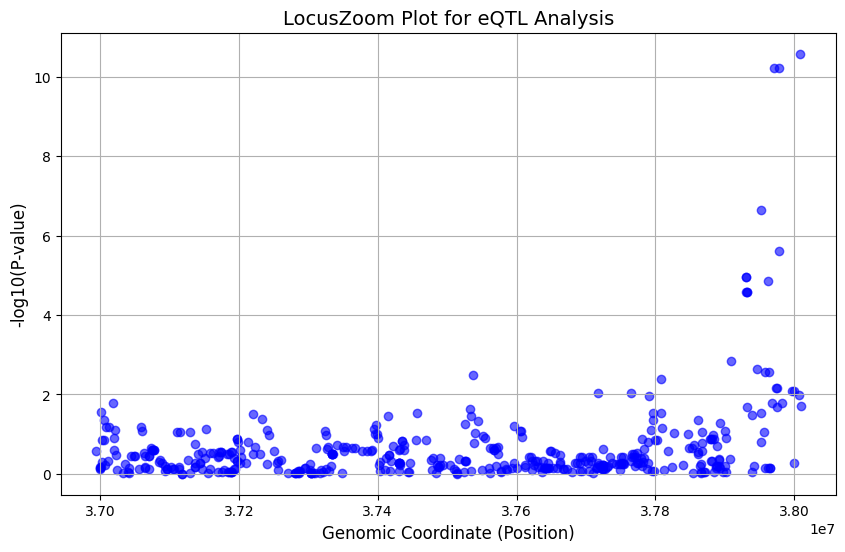

In [284]:
result_position_df['-log10(P-value)'] = -np.log10(result_position_df['P-value'])
plt.figure(figsize=(10, 6))

plt.scatter(result_position_df['position'], result_position_df['-log10(P-value)'], c='blue', alpha=0.6)


plt.xlabel('Genomic Coordinate (Position)', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.title('LocusZoom Plot for eQTL Analysis', fontsize=14)

plt.grid(True)
plt.show()

In [313]:
def eQtl(gene_index, chr = 1):
    each_gene_expression = expression1[expression1['ID'] == gene1.iloc[gene_index]['SYM']]
    each_gene_expression_data = each_gene_expression.T.iloc[4:-1,]
    
    if each_gene_expression.shape[0] != 0:
    
        each_gene_expression_data.columns = [gene1.iloc[gene_index]['SYM']]

        each_gene_name = gene1.iloc[gene_index]['ID']
        each_G = read_plink1_bin(f"cis_snp/1000G.EUR.1.{each_gene_name}.bed", f"cis_snp/1000G.EUR.1.{each_gene_name}.bim", f"cis_snp/1000G.EUR.1.{each_gene_name}.fam", verbose=False)
        each_genotype_matrix = each_G.compute()
        _columns = np.array(each_G.snp)
        _index = np.array(each_G.sample)
        each_snp_df = pd.DataFrame(np.array(each_genotype_matrix), index = _index, columns = _columns)
        each_entire_df = pd.merge(each_gene_expression_data, each_snp_df, left_index=True, right_index=True, how='inner')
        each_gene_expression_data = each_entire_df.iloc[:,0]
        each_snp_df = each_entire_df.iloc[:,1:]
        results = []
        for snp_ in range(len(each_snp_df.columns)):
            
            the_expression = list(np.array(each_gene_expression_data.values))
            snp_genotype = list(np.array(each_snp_df.iloc[:,snp_].values))
            snp_genotype_reshaped = np.array(snp_genotype).reshape(-1, 1)
            model = LinearRegression()
            model.fit(snp_genotype_reshaped, the_expression)
            stats.linregress(snp_genotype, the_expression)
            each_states = stats.linregress(snp_genotype, the_expression)
            results.append([each_snp_df.columns[snp_], model.coef_[0], each_states.pvalue])


        results_df = pd.DataFrame(results, columns=["SNP", "Beta", "P-value"])
        snp_positions = pd.DataFrame({
        'snp': each_G['snp'],  # The SNP column
        'position': each_G['pos']  # The SNP positions (base pair positions)
        })
        result_position_df = pd.merge(snp_positions, results_df, left_on="snp", right_on='SNP')
        result_position_df['-log10(P-value)'] = -np.log10(result_position_df['P-value'])
        result_position_df['cis_gene'] = gene1.iloc[gene_index]['ID']
        return result_position_df
    else:
        return None
    
    

In [328]:
final_result = []
for i in range(0, gene1.shape[0]):
    try:
        result = eQtl(i)  # Call your function
        final_result.append(result)  # Append the result if no exception occurs
    except FileNotFoundError:
        print(f"File not found for index {i}, skipping...")
    except Exception as e:
        print(f"An error occurred for index {i}: {e}, skipping...")
    

An error occurred for index 0: No BED file has been found., skipping...
An error occurred for index 1140: No BED file has been found., skipping...
An error occurred for index 1162: No BED file has been found., skipping...
An error occurred for index 1836: Cannot calculate a linear regression if all x values are identical, skipping...
An error occurred for index 1837: Cannot calculate a linear regression if all x values are identical, skipping...
An error occurred for index 1839: Cannot calculate a linear regression if all x values are identical, skipping...
An error occurred for index 1840: Cannot calculate a linear regression if all x values are identical, skipping...
An error occurred for index 1841: Cannot calculate a linear regression if all x values are identical, skipping...
An error occurred for index 1842: Cannot calculate a linear regression if all x values are identical, skipping...
An error occurred for index 1843: Cannot calculate a linear regression if all x values are ide

In [357]:
final_df = pd.concat(final_result, axis=0, ignore_index=True)

In [358]:
final_df

,snp,position,SNP,Beta,P-value,-log10(P-value),cis_gene
0,rs3094315,752566,rs3094315,-0.046613,3.678645e-07,6.434312,FAM87B
1,rs3131972,752721,rs3131972,-0.045127,8.428176e-07,6.074266,FAM87B
2,rs3131969,754182,rs3131969,0.002844,7.731408e-01,0.111741,FAM87B
3,rs1048488,760912,rs1048488,-0.045292,6.012108e-07,6.220973,FAM87B
4,rs3115850,761147,rs3115850,-0.045504,5.071783e-07,6.294839,FAM87B
...,...,...,...,...,...,...,...
666423,rs4926502,249209140,rs4926502,0.148219,7.280187e-02,1.137857,PGBD2
666424,rs6704311,249210707,rs6704311,-0.017717,7.147621e-01,0.145838,PGBD2
666425,rs34013644,249211350,rs34013644,-0.011718,8.328616e-01,0.079427,PGBD2
666426,rs12746903,249218992,rs12746903,-0.099312,4.292438e-01,0.367296,PGBD2


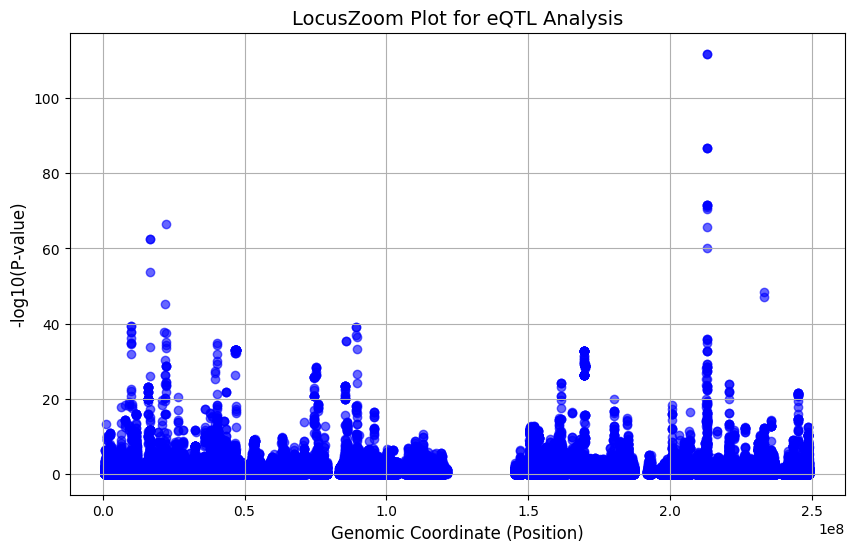

In [359]:

plt.figure(figsize=(10, 6))
plt.scatter(final_df['position'], final_df['-log10(P-value)'], c='blue', alpha=0.6)


plt.xlabel('Genomic Coordinate (Position)', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.title('LocusZoom Plot for eQTL Analysis', fontsize=14)

plt.grid(True)
plt.show()

In [360]:
reference_allele = pd.DataFrame({
    'snp': G['snp'],  # The SNP column
    'effective_a': G['a0']  # The SNP positions (base pair positions)
})
final_df = pd.merge(final_df, reference_allele, left_on='snp', right_on='snp', how = 'inner')
final_df

,snp,position,SNP,Beta,P-value,-log10(P-value),cis_gene,effective_a
0,rs3094315,752566,rs3094315,-0.046613,3.678645e-07,6.434312,FAM87B,G
1,rs3094315,752566,rs3094315,-0.115011,2.460771e-02,1.608929,LINC00115,G
2,rs3094315,752566,rs3094315,0.122756,5.923436e-01,0.227426,LINC01128,G
3,rs3094315,752566,rs3094315,-0.007259,7.665068e-01,0.115484,FAM41C,G
4,rs3094315,752566,rs3094315,0.082625,3.624086e-01,0.440802,SAMD11,G
...,...,...,...,...,...,...,...,...
666423,rs12746903,249218992,rs12746903,-0.099312,4.292438e-01,0.367296,PGBD2,C
666424,rs12726733,249222473,rs12726733,0.185590,2.048698e-01,0.688522,SH3BP5L,A
666425,rs12726733,249222473,rs12726733,-1.333213,1.027715e-01,0.988127,ZNF672,A
666426,rs12726733,249222473,rs12726733,0.596897,4.440257e-01,0.352592,ZNF692,A


In [361]:
final_df.to_csv('chr1eQTL.tsv.gz', sep='\t', index=False, compression='gzip')

In [363]:
final_df.head()

,snp,position,SNP,Beta,P-value,-log10(P-value),cis_gene,effective_a
0,rs3094315,752566,rs3094315,-0.046613,3.678645e-07,6.434312,FAM87B,G
1,rs3094315,752566,rs3094315,-0.115011,2.460771e-02,1.608929,LINC00115,G
2,rs3094315,752566,rs3094315,0.122756,5.923436e-01,0.227426,LINC01128,G
3,rs3094315,752566,rs3094315,-0.007259,7.665068e-01,0.115484,FAM41C,G
4,rs3094315,752566,rs3094315,0.082625,3.624086e-01,0.440802,SAMD11,G


In [364]:
%%bash
plink \
    --bfile 1000G.EUR.1 \
    --clump-p1 1 \
    --clump-r2 0.1 \
    --clump-kb 250 \
    --clump chr1eQTL.tsv.gz \
    --clump-snp-field snp \
    --clump-field P-value \
    --out EUR

PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR.log.
Options in effect:
  --bfile 1000G.EUR.1
  --clump chr1eQTL.tsv.gz
  --clump-field P-value
  --clump-kb 250
  --clump-p1 1
  --clump-r2 0.1
  --clump-snp-field snp
  --out EUR

32768 MB RAM detected; reserving 16384 MB for main workspace.
98642 variants loaded from .bim file.
489 people (0 males, 0 females, 489 ambiguous) loaded from .fam.
Ambiguous sex IDs written to EUR.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 489 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is exactly 1.
98642 variants and 489 people pass filters and QC.
Note: N

In [365]:
!awk 'NR!=1{print $3}' EUR.clumped >  EUR.valid.snp

In [366]:
final_df.to_csv('chr1eQTL', sep='\t', index=False)

In [367]:
!awk '{print $1,$5}' chr1eQTL > SNP.pvalue

In [368]:
%%bash
echo "0.001 0 0.001" > range_list 
echo "0.05 0 0.05" >> range_list
echo "0.1 0 0.1" >> range_list
echo "0.2 0 0.2" >> range_list
echo "0.3 0 0.3" >> range_list
echo "0.4 0 0.4" >> range_list
echo "0.5 0 0.5" >> range_list

In [370]:
'''
%%bash
plink \
    --bfile 1000G.EUR.1 \
    --score chr1eQTL 1 8 4 header \
    --q-score-range range_list SNP.pvalue \
    --extract EUR.valid.snp \
    --out EUR
'''

'\n%%bash\nplink     --bfile 1000G.EUR.1     --score chr1eQTL 1 8 4 header     --q-score-range range_list SNP.pvalue     --extract EUR.valid.snp     --out EUR\n'

In [388]:
eQtl(40)

,snp,position,SNP,Beta,P-value,-log10(P-value),cis_gene
0,rs2710875,977780,rs2710875,0.418053,0.346358,0.460474,ATAD3B
1,rs3128097,980460,rs3128097,0.289455,0.546924,0.262073,ATAD3B
2,rs17160776,985900,rs17160776,0.776887,0.568726,0.245097,ATAD3B
3,rs9803031,987200,rs9803031,0.280773,0.513422,0.289526,ATAD3B
4,rs13303287,987670,rs13303287,0.236279,0.622953,0.205545,ATAD3B
...,...,...,...,...,...,...,...
287,rs3121822,1972462,rs3121822,0.268336,0.593496,0.226582,ATAD3B
288,rs3128317,1979724,rs3128317,0.284037,0.349722,0.456278,ATAD3B
289,rs3795277,1981118,rs3795277,0.379133,0.482220,0.316755,ATAD3B
290,rs6692648,1982397,rs6692648,-0.015629,0.986196,0.006037,ATAD3B


In [389]:
final_df = final_df.loc[final_df.groupby('snp')['-log10(P-value)'].idxmax()]

In [391]:
final_df.to_csv('chr1eQTL.tsv.gz', sep='\t', index=False, compression='gzip')
final_df.to_csv('chr1eQTL', sep='\t', index=False)

In [392]:
%%bash
plink \
    --bfile 1000G.EUR.1 \
    --clump-p1 1 \
    --clump-r2 0.1 \
    --clump-kb 250 \
    --clump chr1eQTL.tsv.gz \
    --clump-snp-field snp \
    --clump-field P-value \
    --out EUR

PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR.log.
Options in effect:
  --bfile 1000G.EUR.1
  --clump chr1eQTL.tsv.gz
  --clump-field P-value
  --clump-kb 250
  --clump-p1 1
  --clump-r2 0.1
  --clump-snp-field snp
  --out EUR

32768 MB RAM detected; reserving 16384 MB for main workspace.
98642 variants loaded from .bim file.
489 people (0 males, 0 females, 489 ambiguous) loaded from .fam.
Ambiguous sex IDs written to EUR.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 489 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is exactly 1.
98642 variants and 489 people pass filters and QC.
Note: N

In [393]:
!awk 'NR!=1{print $3}' EUR.clumped >  EUR.valid.snp

In [394]:
!awk '{print $1,$5}' chr1eQTL > SNP.pvalue

In [395]:
%%bash
echo "0.001 0 0.001" > range_list 
echo "0.05 0 0.05" >> range_list
echo "0.1 0 0.1" >> range_list
echo "0.2 0 0.2" >> range_list
echo "0.3 0 0.3" >> range_list
echo "0.4 0 0.4" >> range_list
echo "0.5 0 0.5" >> range_list

In [396]:
%%bash
plink \
    --bfile 1000G.EUR.1 \
    --score chr1eQTL 1 8 4 header \
    --q-score-range range_list SNP.pvalue \
    --extract EUR.valid.snp \
    --out EUR

PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR.log.
Options in effect:
  --bfile 1000G.EUR.1
  --extract EUR.valid.snp
  --out EUR
  --q-score-range range_list SNP.pvalue
  --score chr1eQTL 1 8 4 header

32768 MB RAM detected; reserving 16384 MB for main workspace.
98642 variants loaded from .bim file.
489 people (0 males, 0 females, 489 ambiguous) loaded from .fam.
Ambiguous sex IDs written to EUR.nosex .
--extract: 9206 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 489 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is exactly 1.
9206 variants and 489 people pass filters and Q

0 due to allele code mismatch); see EUR.nopred for details.


--score: 9206 valid predictors loaded.


--score: 7 ranges processed.
Results written to EUR.*.profile.


In [398]:
%%bash
plink \
    --bfile 1000G.EUR.1 \
    --indep-pairwise 200 50 0.25 \
    --out EUR
# Then we calculate the first 6 PCs
plink \
    --bfile 1000G.EUR.1 \
    --extract EUR.prune.in \
    --pca 6 \
    --out EUR

PLINK v1.9.0-b.7.6 64-bit (13 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR.log.
Options in effect:
  --bfile 1000G.EUR.1
  --indep-pairwise 200 50 0.25
  --out EUR

32768 MB RAM detected; reserving 16384 MB for main workspace.
98642 variants loaded from .bim file.
489 people (0 males, 0 females, 489 ambiguous) loaded from .fam.
Ambiguous sex IDs written to EUR.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 489 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is exactly 1.
98642 variants and 489 people pass filters and QC.
Note: No phenotypes present.
Pruned 85348 variants from chromosome 1, leaving 13294.
Pruning comple

In [409]:
expression1
threshold = [0.001,0.05,0.1,0.2,0.3,0.4,0.5]
pcs = pd.read_table("EUR.eigenvec", delim_whitespace=True, header=None)
pcs.columns = ["FID", "IID"] + [f"PC{i+1}" for i in range(6)]

In [417]:
pcs

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6
0,HG00096,HG00096,0.002762,-0.064811,-0.017195,-0.038696,0.023665,0.014281
1,HG00097,HG00097,0.010548,-0.043876,0.026978,0.000886,-0.053881,-0.029979
2,HG00099,HG00099,0.006769,-0.057223,0.055099,-0.013844,-0.003559,0.080703
3,HG00101,HG00101,0.013402,-0.069042,0.043211,-0.042528,0.015746,0.051912
4,HG00102,HG00102,-0.016259,-0.055930,0.034369,-0.038166,0.007197,-0.024659
...,...,...,...,...,...,...,...,...
484,NA20822,NA20822,-0.031923,0.029817,-0.073747,0.024692,-0.012732,-0.013244
485,NA20826,NA20826,-0.041490,0.059467,0.000351,-0.060303,-0.061740,0.051848
486,NA20827,NA20827,-0.043629,0.043812,-0.014198,0.002133,-0.006634,-0.016262
487,NA20828,NA20828,-0.039842,0.020391,0.030519,0.021280,-0.024076,-0.005782
